In [3]:
import os
from tqdm import tqdm
import pandas as pd 
import numpy as np

import re
import string
from textblob import TextBlob
from bs4  import BeautifulSoup

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

#Lemmatizing and POSTagging

from nltk import pos_tag
from nltk.tag.stanford import StanfordPOSTagger
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk_lemmatizer = WordNetLemmatizer()

from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

punct = set(string.punctuation)
modalVerb =['can', 'could', 'may', 'might', 'will', 'would', 'shall', 'should', 'must']
stopWords = set(stopwords.words('english'))
stopWords.remove('not')
stopWords.remove('can')
stopWords.remove('will')
# REMOVE SINGLE ALPHABET a, e, s etc ..
    

tqdm.pandas() 
import pickle

Using TensorFlow backend.


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import spacy
import en_core_web_sm
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
from contractions import CONTRACTION_MAP
import unicodedata


tqdm.pandas() 
import pickle
%matplotlib inline

tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')


In [5]:
nlp = en_core_web_sm.load()

# Initializing and decalring constant
* Stanford POS tagger importing

In [6]:
stopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same

# importing Data and exploring

In [7]:
df= pd.read_csv("D:\dataset\Sentiment analysis Data\imdb_master.csv",encoding='cp1252')

In [8]:
df.tail()

,Unnamed: 0,type,review,label,file
99995,99995,train,"Delightfully awful! Made by David Giancola, a ...",unsup,9998_0.txt
99996,99996,train,"Watching Time Chasers, it obvious that it was ...",unsup,9999_0.txt
99997,99997,train,At the beginning we can see members of Troma t...,unsup,999_0.txt
99998,99998,train,"The movie was incredible, ever since I saw it ...",unsup,99_0.txt
99999,99999,train,"TCM came through by acquiring this wonderful, ...",unsup,9_0.txt


In [9]:
#dropping uncessary columns
#df.drop(df['Unnamed: 0','file'],axis =1)

In [10]:
df.columns

Index(['Unnamed: 0', 'type', 'review', 'label', 'file'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
Unnamed: 0    100000 non-null int64
type          100000 non-null object
review        100000 non-null object
label         100000 non-null object
file          100000 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


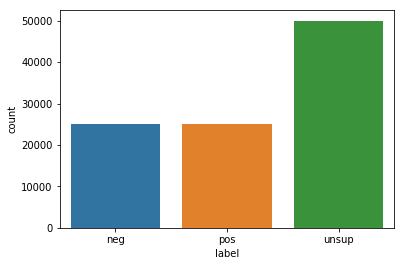

In [12]:
sns.countplot(df["label"])

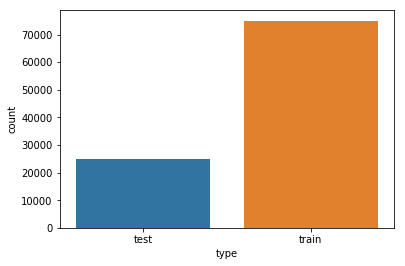

In [13]:
#df.groupby("label").describe()
sns.countplot(df["type"])

In [14]:
df["type"].value_counts()

train    75000
test     25000
Name: type, dtype: int64

# so summary 1
label = ['neg','pos','unsup']
        #25K  , #25K   , # 50K
type= ['test','train']
        #25 , # 75
        
# NEG = 0 and POS = 1 and unlabel = 2
    

In [15]:
def word_count_in_review(review):
    tokens = word_tokenize(review)
    return len(tokens)  

def encodeLabel(label):
    if label == "neg":
        return pd.to_numeric('0.0',downcast='float')
    elif label == "pos":
        return pd.to_numeric('1.0',downcast='float')
    elif label == "unsup":
        return pd.to_numeric('2.0',downcast='float')

In [16]:
%%time
df["word_count"] = df["review"].progress_apply(lambda x : word_count_in_review(x))

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [05:05<00:00, 327.08it/s]


Wall time: 5min 5s


In [17]:
df['label_encode'] =  df['label'].progress_apply(lambda x : encodeLabel(x))

100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [00:09<00:00, 10434.93it/s]


In [18]:
df.head()

,Unnamed: 0,type,review,label,file,word_count,label_encode
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt,187,0.0
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt,274,0.0
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt,278,0.0
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt,343,0.0
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt,286,0.0


# Freq dist plot and Statistics of text data

In [19]:
#freq distribution lenght of data
def stats_of_freq_distribution(freq_column):
    print("MEAN length of data set :",np.mean(freq_column))
    print("MEDIAN length of data set :",np.median(freq_column))
    print("STD DEV length of data set :",np.std(freq_column))
    print("MAX token of data set :",np.max(freq_column))
    print("MIN token of data set :",np.min(freq_column))
    
def plot_length_distribution(freq_column):
    plt.hist(freq_column, bins=50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()


# Wordcount before preprocessing

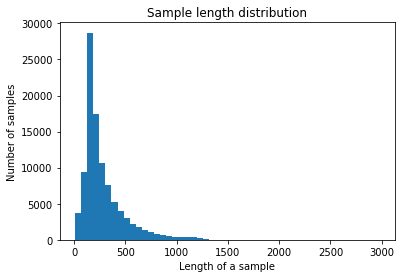

In [20]:
plot_length_distribution(df['word_count'])

In [21]:
#mean length of data set
stats_of_freq_distribution(df['word_count'])

MEAN length of data set : 281.28154
MEDIAN length of data set : 210.0
STD DEV length of data set : 209.37237094523337
MAX token of data set : 2977
MIN token of data set : 8


# test data =>  from 0 to df.iloc[24999] 
# train dat   => from 25k to df.iloc[49999] 
# unsup data  => from df.iloc[50000]
**neg = 0 and pos = 1 and  unsup = 2**

In [22]:
df.iloc[24999] 

Unnamed: 0                                                  24999
type                                                         test
review          I've seen this story before but my kids haven'...
label                                                         pos
file                                                      9_7.txt
word_count                                                    239
label_encode                                                    1
Name: 24999, dtype: object

In [23]:
#stpword1 = ['a', 'about' , 'an' , 'are', 'as', 'at', 'be','by','com','de','en','for','from','how','i','in','is','it','la','of','on','or','that', 'the', 'this'  , 'to' , 'was', 'what' , 'when', 'where', 'who', 'will', 'with', 'und', 'the' , 'www'   ]

In [24]:
df.head()

,Unnamed: 0,type,review,label,file,word_count,label_encode
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt,187,0.0
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt,274,0.0
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt,278,0.0
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt,343,0.0
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt,286,0.0


# PreProcess step1

# https://mlwhiz.com/blog/2019/01/17/deeplearning_nlp_preprocess/

In [25]:
df_preprocessed = pd.DataFrame()

In [31]:

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>Some important text</h2></html>')

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')


# here contractions.py hold info about it 
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

expand_contractions("Y'all can't expand contractions I'd think")


def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)



def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")


def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

In [41]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    #for doc in corpus:
        # strip HTML
    if html_stripping:
        doc = strip_html_tags(corpus)
        # remove accented characters
    if accented_char_removal:
        doc = remove_accented_chars(doc)
        # expand contractions    
    if contraction_expansion:
        doc = expand_contractions(doc)
        # lowercase the text    
    if text_lower_case:
        doc = doc.lower()
        # remove extra newlines
    doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
    if text_lemmatization:
        doc = lemmatize_text(doc)
        # remove special characters and\or digits    
    if special_char_removal:
            # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
    if stopword_removal:
        doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
    #normalized_corpus.append(doc)
    return doc

In [45]:

#%%time
df_preprocessed["review"] = df["review"].progress_apply(lambda x : normalize_corpus(x))

#normalize_corpus('once you leave the function the file would almost certainly be closed, if there were no references to the file object it would be closed after reading, you can see it in this stackoverflow.com/questions/37220460/…. It would be no harm to use a with block but not really needed.')


100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [1:36:43<00:00, 17.23it/s]


# Preprocess Handle POS and lemmatization step 2

# Here using normal pos_tag as stanford is giving error****

In [46]:
# testing 49460
#earlier after processsing
'''
great gangster filmsam mendes direct beautiful movie show another fatherson camaraderiebrilliant starcast lead tom 
hanksmichael sullivan do terrific jobgreat act againhe act legendgreat act paul newmanjude law daniel craigcasting goodthe
plot quite goodyou enjoy moviea great portrayal gangster isset isthis surely stand zenith gangster movie 
erasoundtrack pretty good apt moviea great flick totality show father protect sonway underrated likingdeserved fully deserve
'''
df_preprocessed['review'].iloc[49458]

'great gangster film sam mende direct beautiful movie show another father son camaraderie brilliant star cast lead tom hanks michael sullivan terrific job great act act legend great act paul newman jude law daniel craig casting good plot quite good enjoy movie great portrayal gangster set surely stand zenith gangster movie era soundtrack pretty good apt movie great flick totality show father protect son way underrated liking deserve fully deserve'

In [48]:
%%time
df_preprocessed['sentiment'] = df['label_encode']
df_preprocessed["word_count"] = df_preprocessed["review"].progress_apply(lambda x : word_count_in_review(x))

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:48<00:00, 2049.12it/s]


Wall time: 48.8 s


In [49]:
df_preprocessed.columns

Index(['review', 'sentiment', 'word_count'], dtype='object')

# Org. data plot VS processed data plot

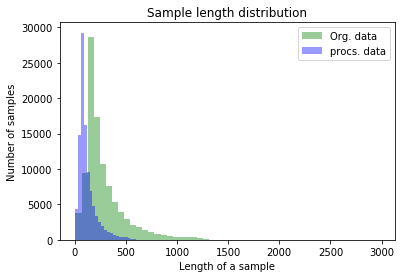

In [50]:
plt.hist(df['word_count'], bins=50,color='green',alpha=0.4, label="Org. data" )
plt.hist(df_preprocessed['word_count'], bins=50,color='blue',alpha=0.4,label="procs. data")
plt.xlabel('Length of a sample')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.legend()
plt.show()

# Shuffle DataFrame rows 1st 50 k 

In [56]:
df_preprocessed[0:49999] = df_preprocessed[0:49999].sample(frac=1).reset_index(drop=True)

In [57]:
df_preprocessed.head(10)

,review,sentiment,word_count
0,disappointing end season start well exodus par...,0.0,62
1,adventure hercule one lame excuse movie yet ru...,0.0,174
2,honestly may bad movie ever see see spider bab...,0.0,75
3,absolutely no reason waste time film original ...,0.0,69
4,not read book open fresh interpretation direct...,1.0,53
5,love show hate go season finale feel like fore...,1.0,81
6,classic example cinema verite sort realist doc...,1.0,311
7,look year wrestlemania match card stoked unabl...,0.0,107
8,phenomenal movie truly one good movie ever wat...,1.0,89
9,episode apparently grow cold war holocaust som...,1.0,61


# Deciding seq length

In [58]:
stats_of_freq_distribution(df_preprocessed['word_count'][0:49999])

MEAN length of data set : 121.17214344286886
MEDIAN length of data set : 90.0
STD DEV length of data set : 91.29135659778275
MAX token of data set : 1432
MIN token of data set : 3


In [60]:
max_tokens = 121 + 2 * 90
max_tokens

301

# number of sentence above 300 sequnce from top 50k data

In [61]:
print(len(df_preprocessed[df_preprocessed['word_count'] > 300][0:49999]  ))

5768


In [63]:
np.sum(df_preprocessed['word_count'][0:49999] < max_tokens) / len(df_preprocessed['word_count'][0:49999])

0.9444388887777756

In [62]:
pd.to_pickle(df_preprocessed, "./pickle/V1_spacy.pkl")

In [ ]:
#POS_lemmatize("Pickle does need to recursively walk your trie. If Pickle is using just 5 levels of function calls to do the work your trie of depth 638 will need the level set to more than 3000")

In [ ]:
#picle location = D:\NLP\andrew\nlp\8. State of the arts\25000 data pre processings